# Trained ResNet-50 classification on cervix images

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import os
from datetime import datetime
import numpy as np

In [3]:
# Project
import sys
sys.path.append(os.path.join(os.path.abspath(os.path.dirname('.')), '..', 'common'))

In [4]:
import matplotlib.pylab as plt
%matplotlib inline

def plt_st(n, m):
    plt.figure(figsize=(n, m))

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
from resnet_keras122 import get_resnet_original, get_resnet50

In [6]:
from training_utils import get_trainval_id_type_lists

print("\n {} - Get train/val lists ...".format(datetime.now()))
train_id_type_list, val_id_type_list = get_trainval_id_type_lists()

cervix_train_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in train_id_type_list if id_type[0] != '1339']
cervix_val_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in val_id_type_list if id_type[0] != '1339']


 2017-04-08 01:51:49.254026 - Get train/val lists ...
Train dataset contains : 
('-', [175, 546, 315], ' images of corresponding types')
Validation dataset contains : 
('-', [75, 234, 135], ' images of corresponding types')


In [9]:
print("\n {} - Get ResNet-50 model ...".format(datetime.now()))
#resnet = get_resnet_original(opt='nadam')
resnet = get_resnet50(opt='adadelta')


 2017-04-08 01:52:11.034954 - Get ResNet-50 model ...


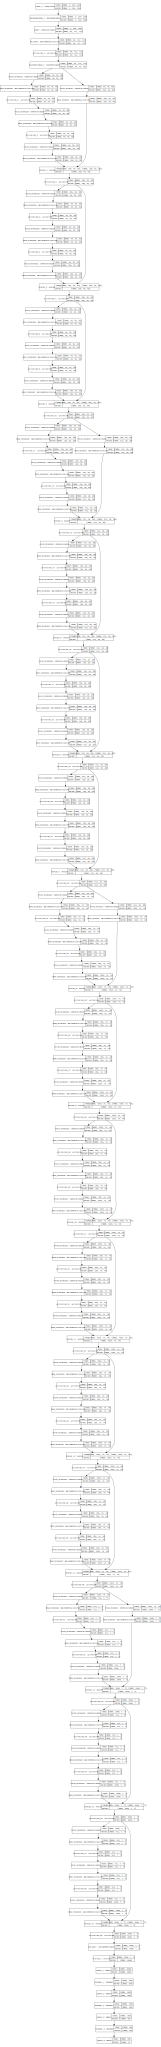

In [10]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

graph = model_to_dot(resnet, True, True)
SVG(graph.create(prog='dot', format='svg'))

In [9]:
# from training_utils import exp_decay

# lr_1 = 1.0; a_1 = 0.95
# lr_2 = 1e-1; a_2 = 0.985

# epochs = np.arange(0, 50)
# lrs_1 = exp_decay(epochs, lr=lr_1, a=a_1)
# lrs_2 = exp_decay(epochs, lr=lr_2, a=a_2)
# plt_st(12, 5)
# plt.plot(epochs, lrs_1, label="lr=%f, a=%f" % (lr_1, a_1))
# plt.plot(epochs, lrs_2, label="lr=%f, a=%f" % (lr_2, a_2))
# plt.legend()

In [11]:
seed = 2017
np.random.seed(seed)
save_prefix='resnet_4_dense_cervix_adadelta_seed=%i' % seed

In [22]:
from glob import glob

weights_files = glob("weights/%s*.h5" % save_prefix)
best_val_loss = 1e5
best_weights_filename = ""
for f in weights_files:
    index = os.path.basename(f).index('-')
    loss = float(os.path.basename(f)[index+1:-4])
    if best_val_loss > loss:
        best_val_loss = loss
        best_weights_filename = f
print("Best val loss weights: ", best_weights_filename)


if len(best_weights_filename) > 0:
    # load weights to the model
    print("Load found weights: ", best_weights_filename)
    resnet.load_weights(best_weights_filename)

('Best val loss weights: ', 'weights/resnet_4_dense_cervix_adadelta_seed=2017_12-0.9339.h5')
('Load found weights: ', 'weights/resnet_4_dense_cervix_adadelta_seed=2017_12-0.9339.h5')


In [14]:
from xy_providers import DataCache
cache = DataCache(2000)

In [15]:
if True:
    from training_utils import classification_train as train
      
    nb_epochs = 50
    batch_size = 4
    
#     lrate_decay_f = lambda epoch: exp_decay(epoch, lr=lr_1, a=a_1) 

    print("\n {} - Start training ...".format(datetime.now()))
    h = train(resnet, 
              cervix_train_id_type_list, 
              cervix_val_id_type_list, 
              nb_epochs=nb_epochs,
              lrate_decay_f=None, #lrate_decay_f,
              batch_size=batch_size, 
              xy_provider_cache=cache,
              seed=seed,
              save_prefix=save_prefix)    


 2017-04-08 01:53:40.703906 - Start training ...
('-- Training parameters: ', 4, 50, 2048, 1024)
-- Fit stats of train dataset
1635/1635 [==============================] - 27s    
-- Fit model
Epoch 1/50
2048/2048 [==============================] - 206s - loss: 1.2207 - acc: 0.3418 - val_loss: 1.0920 - val_acc: 0.3799
Epoch 2/50
2048/2048 [==============================] - 201s - loss: 1.1080 - acc: 0.3516 - val_loss: 1.0815 - val_acc: 0.4453
Epoch 3/50
2048/2048 [==============================] - 203s - loss: 1.0877 - acc: 0.3740 - val_loss: 1.0266 - val_acc: 0.5107
Epoch 4/50
2048/2048 [==============================] - 203s - loss: 1.0446 - acc: 0.4214 - val_loss: 1.0064 - val_acc: 0.4912
Epoch 5/50
2048/2048 [==============================] - 198s - loss: 1.0354 - acc: 0.4351 - val_loss: 0.9791 - val_acc: 0.5215
Epoch 6/50
2048/2048 [==============================] - 201s - loss: 1.0137 - acc: 0.4644 - val_loss: 0.9810 - val_acc: 0.5059
Epoch 7/50
2048/2048 [======================

KeyboardInterrupt: 

In [18]:
if True:
    from training_utils import classification_train as train, exp_decay
      
    nb_epochs = 50
    batch_size = 4
    
    lr_1 = 1.0; a_1 = 0.975
    lrate_decay_f = lambda epoch: exp_decay(epoch, lr=lr_1, a=a_1) 

    print("\n {} - Start training ...".format(datetime.now()))
    h = train(resnet, 
              cervix_train_id_type_list, 
              cervix_val_id_type_list, 
              nb_epochs=nb_epochs,
              lrate_decay_f=lrate_decay_f,
              batch_size=batch_size, 
              xy_provider_cache=cache,
              seed=seed,
              save_prefix=save_prefix)    


 2017-04-08 03:36:59.767949 - Start training ...
('-- Training parameters: ', 4, 50, 2048, 1024)
-- Fit stats of train dataset
Load existing file: /Users/vfomin/Documents/ML/Kaggle/Intel_MobileODT/input/generated/resnet_4_dense_cervix_adadelta_seed=2017_stats.npz
No need to recompute statistics
-- Fit model
Epoch 1/50
2048/2048 [==============================] - 202s - loss: 0.9419 - acc: 0.5337 - val_loss: 1.0274 - val_acc: 0.5469
Epoch 2/50
2048/2048 [==============================] - 202s - loss: 0.9738 - acc: 0.5171 - val_loss: 1.0626 - val_acc: 0.5420
Epoch 3/50
2048/2048 [==============================] - 199s - loss: 0.9447 - acc: 0.5503 - val_loss: 1.1107 - val_acc: 0.5645
Epoch 4/50
2048/2048 [==============================] - 199s - loss: 0.9590 - acc: 0.5308 - val_loss: 1.0625 - val_acc: 0.5488
Epoch 5/50
2048/2048 [==============================] - 199s - loss: 0.9823 - acc: 0.5215 - val_loss: 1.0395 - val_acc: 0.5547
Epoch 6/50
2048/2048 [==============================] -

In [19]:
from training_utils import classification_validate as validate
from test_utils import classification_predict as predict

batch_size = 4

In [69]:
from xy_providers import cached_image_label_provider
from preprocessing.image.iterators import ImageDataIterator
from metrics import logloss_mc

xy_provider = cached_image_label_provider
val_iter = ImageDataIterator(xy_provider(cervix_val_id_type_list,
                                         test_mode=True,
                                         cache=cache),
                             len(cervix_val_id_type_list),
                             None,  # image generator
                             batch_size=batch_size,
                             data_format='channels_first')

Y_pred = np.zeros((len(cervix_val_id_type_list), 3), dtype=np.float32)
Y_true = np.zeros((len(cervix_val_id_type_list), 3), dtype=np.uint8)
total_counter = 0
for x, y_true, info in val_iter:
    s = y_true.shape[0]
    y_pred = resnet.predict(x)
    Y_pred[total_counter*batch_size:total_counter*batch_size + s, :] = y_pred
    Y_true[total_counter*batch_size:total_counter*batch_size + s, :] = y_true
    print("--", total_counter*batch_size + s)
    total_counter += 1

('--', 4)
('--', 8)
('--', 12)
('--', 16)
('--', 20)
('--', 24)
('--', 28)
('--', 32)
('--', 36)
('--', 40)
('--', 44)
('--', 48)
('--', 52)
('--', 56)
('--', 60)
('--', 64)
('--', 68)
('--', 72)
('--', 76)
('--', 80)
('--', 84)
('--', 88)
('--', 92)
('--', 96)
('--', 100)
('--', 104)
('--', 108)
('--', 112)
('--', 116)
('--', 120)
('--', 124)
('--', 128)
('--', 132)
('--', 136)
('--', 140)
('--', 144)
('--', 148)
('--', 152)
('--', 156)
('--', 160)
('--', 164)
('--', 168)
('--', 172)
('--', 176)
('--', 180)
('--', 184)
('--', 188)
('--', 192)
('--', 196)
('--', 200)
('--', 204)
('--', 208)
('--', 212)
('--', 216)
('--', 220)
('--', 224)
('--', 228)
('--', 232)
('--', 236)
('--', 240)
('--', 244)
('--', 248)
('--', 252)
('--', 256)
('--', 260)
('--', 264)
('--', 268)
('--', 272)
('--', 276)
('--', 280)
('--', 284)
('--', 288)
('--', 292)
('--', 296)
('--', 300)
('--', 304)
('--', 308)
('--', 312)
('--', 316)
('--', 320)
('--', 324)
('--', 328)
('--', 332)
('--', 336)
('--', 340)
('--',

In [70]:
loss = logloss_mc(Y_true, Y_pred)
print("Loss : ", loss)

('Loss : ', 1.9932698)


In [60]:
print("\n {} - Start validation ...".format(datetime.now()))
validate(resnet, cervix_val_id_type_list, batch_size=batch_size, xy_provider_cache=cache)


 2017-04-08 10:44:25.551354 - Start validation ...
('--', 4, 'batch loss : ', 2.4019909, ' | info:', array([('619', 'Type_1_cervix'), ('577', 'Type_2_cervix'),
       ('627', 'Type_3_cervix'), ('620', 'Type_1_cervix')], dtype=object))
('--', 8, 'batch loss : ', 2.5462778, ' | info:', array([('581', 'Type_2_cervix'), ('628', 'Type_3_cervix'),
       ('623', 'Type_1_cervix'), ('584', 'Type_2_cervix')], dtype=object))
('--', 12, 'batch loss : ', 1.294191, ' | info:', array([('629', 'Type_3_cervix'), ('624', 'Type_1_cervix'),
       ('586', 'Type_2_cervix'), ('63', 'Type_3_cervix')], dtype=object))
('--', 16, 'batch loss : ', 2.9172502, ' | info:', array([('641', 'Type_1_cervix'), ('588', 'Type_2_cervix'),
       ('630', 'Type_3_cervix'), ('643', 'Type_1_cervix')], dtype=object))
('--', 20, 'batch loss : ', 2.1739337, ' | info:', array([('589', 'Type_2_cervix'), ('631', 'Type_3_cervix'),
       ('645', 'Type_1_cervix'), ('591', 'Type_2_cervix')], dtype=object))
('--', 24, 'batch loss : ',

In [24]:
print("\n {} - Start predictions and write submission ...".format(datetime.now()))
from test_utils import get_test_id_type_list
test_id_type_list = get_test_id_type_list()
cervix_test_id_type_list = [(id_type[0], id_type[1] + '_cervix') for id_type in test_id_type_list]
predict(resnet, cervix_test_id_type_list, info=save_prefix, batch_size=batch_size)


 2017-04-08 09:58:51.199625 - Start predictions and write submission ...
('--', 0, '/', 512)
('--', 4, '/', 512)
('--', 8, '/', 512)
('--', 12, '/', 512)
('--', 16, '/', 512)
('--', 20, '/', 512)
('--', 24, '/', 512)
('--', 28, '/', 512)
('--', 32, '/', 512)
('--', 36, '/', 512)
('--', 40, '/', 512)
('--', 44, '/', 512)
('--', 48, '/', 512)
('--', 52, '/', 512)
('--', 56, '/', 512)
('--', 60, '/', 512)
('--', 64, '/', 512)
('--', 68, '/', 512)
('--', 72, '/', 512)
('--', 76, '/', 512)
('--', 80, '/', 512)
('--', 84, '/', 512)
('--', 88, '/', 512)
('--', 92, '/', 512)
('--', 96, '/', 512)
('--', 100, '/', 512)
('--', 104, '/', 512)
('--', 108, '/', 512)
('--', 112, '/', 512)
('--', 116, '/', 512)
('--', 120, '/', 512)
('--', 124, '/', 512)
('--', 128, '/', 512)
('--', 132, '/', 512)
('--', 136, '/', 512)
('--', 140, '/', 512)
('--', 144, '/', 512)
('--', 148, '/', 512)
('--', 152, '/', 512)
('--', 156, '/', 512)
('--', 160, '/', 512)
('--', 164, '/', 512)
('--', 168, '/', 512)
('--', 1

## Analyse predictions

In [71]:
batch_size = 4
from xy_providers import cached_image_label_provider
from preprocessing.image.iterators import ImageDataIterator
from metrics import logloss_mc

xy_provider = cached_image_label_provider
val_iter = ImageDataIterator(xy_provider(cervix_val_id_type_list,
                                         test_mode=True,
                                         cache=cache),
                             len(cervix_val_id_type_list),
                             None,  # image generator
                             batch_size=batch_size,
                             data_format='channels_first')
total_counter = 0

('--', 20)
(('602', 'Type_2_cervix'), array([ 0.00190561,  0.03086733,  0.9672271 ], dtype=float32))
(('661', 'Type_3_cervix'), array([ 0.00191835,  0.02823581,  0.96984577], dtype=float32))
(('683', 'Type_1_cervix'), array([ 0.27233556,  0.3641119 ,  0.36355254], dtype=float32))
(('603', 'Type_2_cervix'), array([ 0.020846  ,  0.10928339,  0.86987054], dtype=float32))


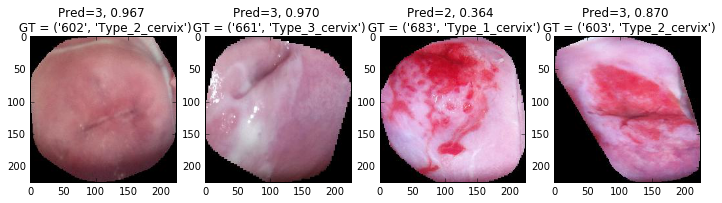

In [87]:
for x, y_true, info in val_iter:
    s = y_true.shape[0]
    y_pred = resnet.predict(x)
    print("--", total_counter*batch_size + s)    
    total_counter += 1
    plt_st(12, 4)
    for i in range(s):
        print(info[i], y_pred[i])
        plt.subplot(1, s, i+1)
        plt.title("Pred={}, {:.3f} \n GT = {}".format(np.argmax(y_pred[i])+1, np.max(y_pred[i]), info[i]))
        plt.imshow(x[i, :, :, :].transpose([1, 2, 0]))
    break